This notebook provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display some images.

Builds several fully connected networks exploring both in depth and width of the network-

### Refs 

https://www.tensorflow.org/install

https://www.tensorflow.org/tutorials/keras/classification
    

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Auxiliary functions to show plots of training history and display images

In [2]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, images, labels):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(images[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
      


def show_histories():

    # summarize history for accuracy
    plt.plot(history1.history['accuracy'])
    plt.plot(history2.history['accuracy'])
    plt.plot(history3.history['accuracy'])
    plt.plot(history4.history['accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['model 1', 'model 2', 'model 3', 'model 4'], loc='lower right')
    plt.show()


def show_accuracies(): 
    fig, ax = plt.subplots()
    X = np.arange(4)

    models = ['model 1', 'model 2', 'model 3', 'model 4']
    plt.bar(X, eval, width = 0.4, color = 'b', label='eval')
    plt.bar(X + 0.4, train, color = 'r', width = 0.4, label = "train")
    plt.xticks(X + 0.4 / 2, models)
    plt.ylim(top = 1.0, bottom = 0.95)
    plt.legend(loc='lower right')
    plt.show()

    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()

class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')    

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()
        

## Load the dataset from Tensorflow 

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

eval = []
train = []

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Display a few images

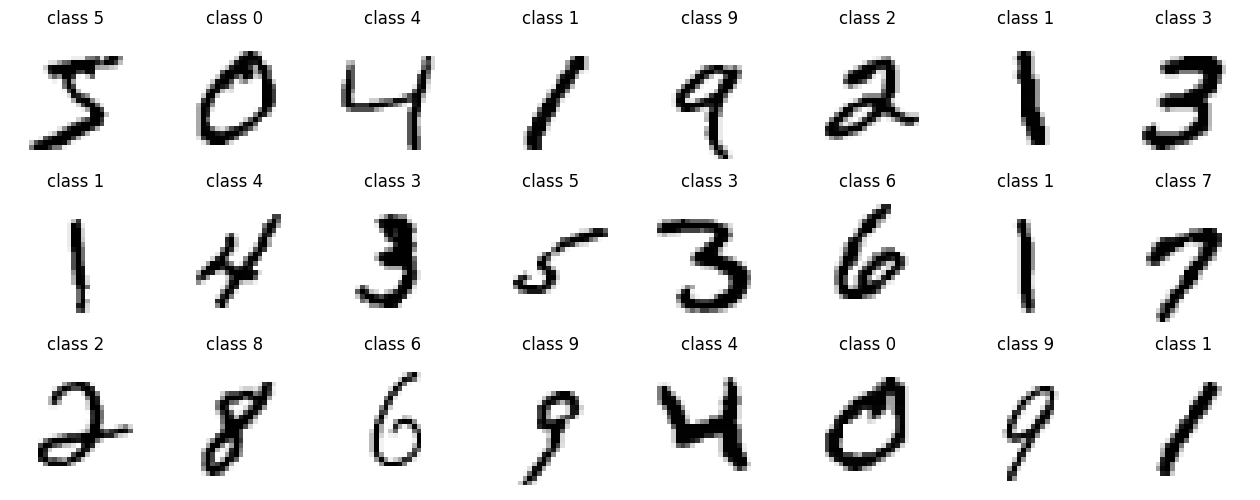

<Figure size 640x480 with 0 Axes>

In [4]:
show_images(3,8,x_train, y_train) 

# Create first model

Single hidden layer with 64 units

In [5]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


## Display model information

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


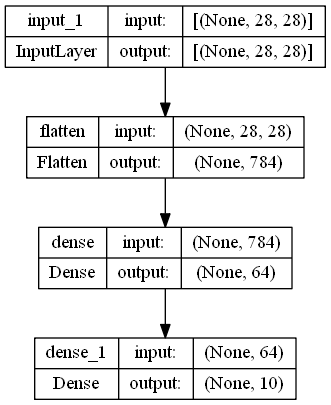

In [6]:
print(model1.summary())
# the second parameter can be used to save the plot to a file
tf.keras.utils.plot_model(model1, 'multi_input_and_output_model.png', show_shapes=True)

## Specify the optimizer, loss and metrics

optimizer: gradient descent optimization algorithm

loss: the loss function upon which derivatives are computed

metrics: metrics to be evaluated during tranining and evaluation

In [7]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [8]:
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 2ms/step - loss: 0.3023 - accuracy: 0.9155
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9580
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1031 - accuracy: 0.9699
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0813 - accuracy: 0.9760
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0667 - accuracy: 0.9801
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0553 - accuracy: 0.9832
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0481 - accuracy: 0.9852
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9879
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.03

## History graphs for accuracy and loss


dict_keys(['loss', 'accuracy'])


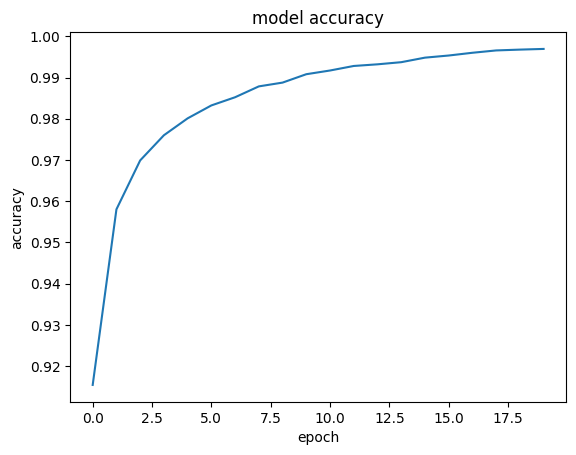

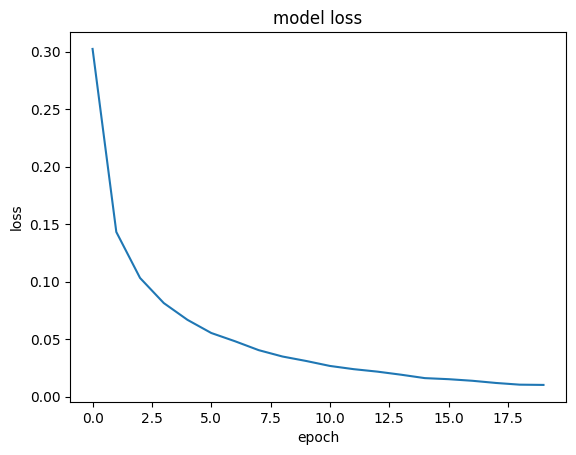

In [9]:
show_history(history1)


## Evaluate the model on the test set

In [10]:
eval.append(model1.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history1.history['accuracy'][19])



313/313 - 5s - loss: 0.1140 - accuracy: 0.9750 - 5s/epoch - 16ms/step


# Create model 2

wider model, doubling the number of units in the hidden layer

In [11]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Display model information

In [12]:
print(model2.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## Train the model

In [13]:
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2571 - accuracy: 0.9270
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9654
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0794 - accuracy: 0.9758
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9813
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9860
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9906
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0191 - accuracy: 0.9943
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

## History graphs for accuracy and loss

dict_keys(['loss', 'accuracy'])


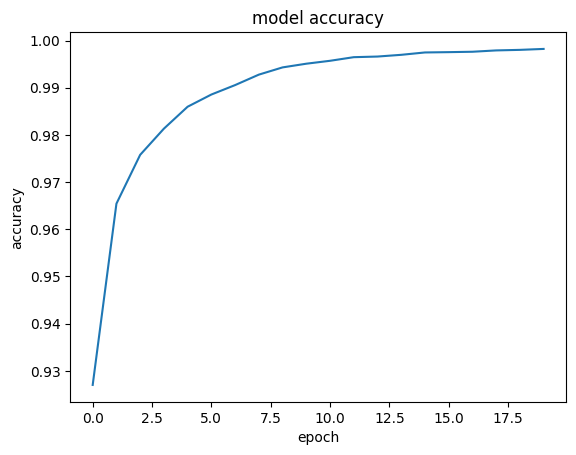

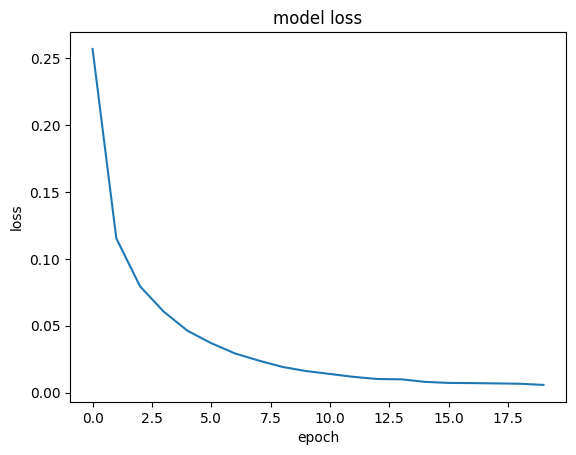

In [14]:
show_history(history2)

## Evaluate the model on the test set

In [15]:
eval.append(model2.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history2.history['accuracy'][19])

313/313 - 4s - loss: 0.1136 - accuracy: 0.9783 - 4s/epoch - 14ms/step


# Model 3

Adding a second hidden layer

In [16]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history3 = model3.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 2ms/step - loss: 0.2300 - accuracy: 0.9325
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0980 - accuracy: 0.9699
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0697 - accuracy: 0.9782
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9842
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9867
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9894
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0263 - accuracy: 0.9912
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0244 - accuracy: 0.9912
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

dict_keys(['loss', 'accuracy'])


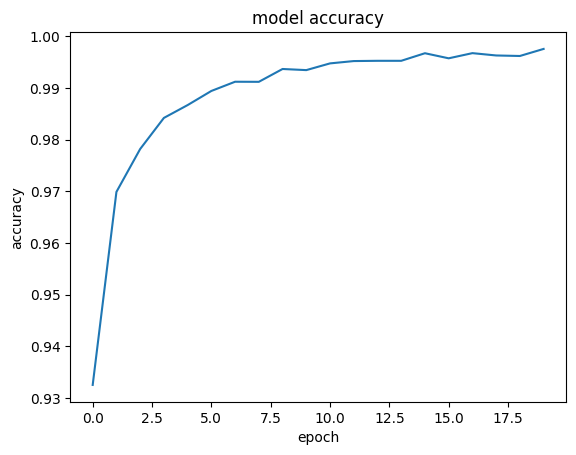

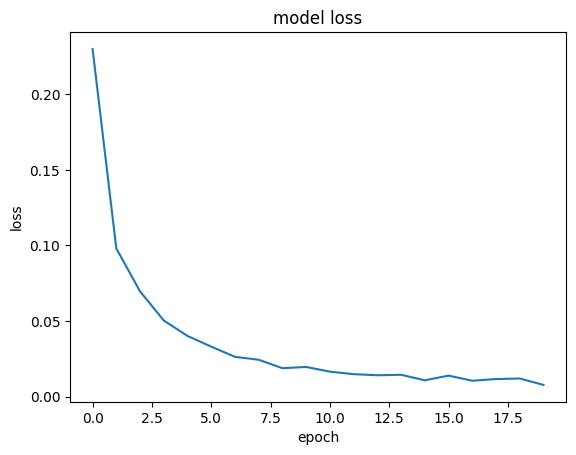

In [19]:
show_history(history3)

In [20]:
eval.append(model3.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history3.history['accuracy'][19])

313/313 - 5s - loss: 0.1005 - accuracy: 0.9819 - 5s/epoch - 15ms/step


# Model 4

Adding a third hidden layer

In [21]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
print(model4.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history4 = model4.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2276 - accuracy: 0.9311
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0986 - accuracy: 0.9691
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0556 - accuracy: 0.9824
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9857
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9880
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9893
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.022

dict_keys(['loss', 'accuracy'])


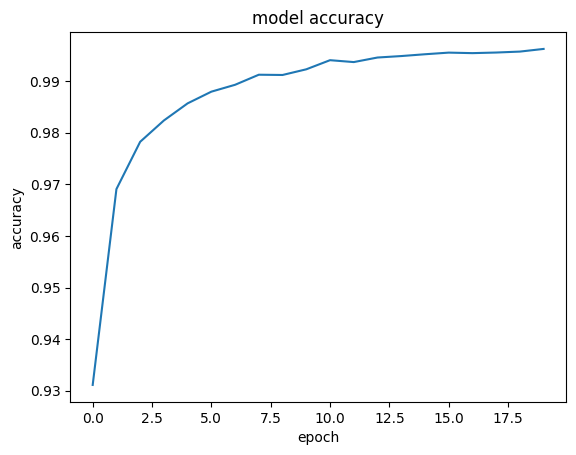

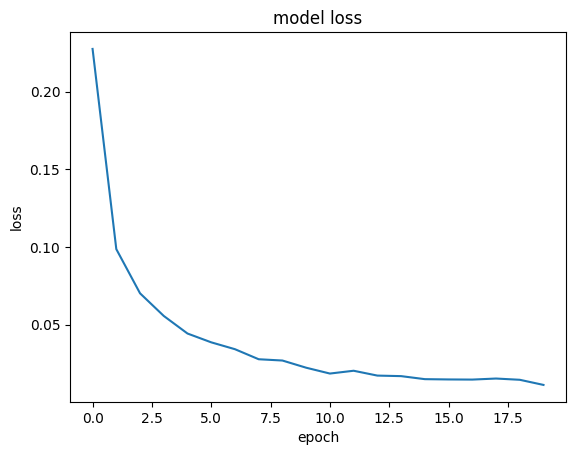

In [24]:
show_history(history4)

In [25]:
eval.append(model4.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history4.history['accuracy'][19])

313/313 - 5s - loss: 0.1141 - accuracy: 0.9770 - 5s/epoch - 15ms/step


In [26]:
predictions = model4.predict(x_test)
predicted_label = np.argmax(predictions[0])

print(predictions[0])
print(predicted_label)

313/313 [==============================] - 4s 1ms/step
[4.9384367e-15 1.2622111e-12 2.5480773e-13 6.0739270e-12 8.3480404e-07
 1.4888767e-13 4.5063349e-16 9.9999917e-01 7.2476221e-16 2.9656482e-09]
7


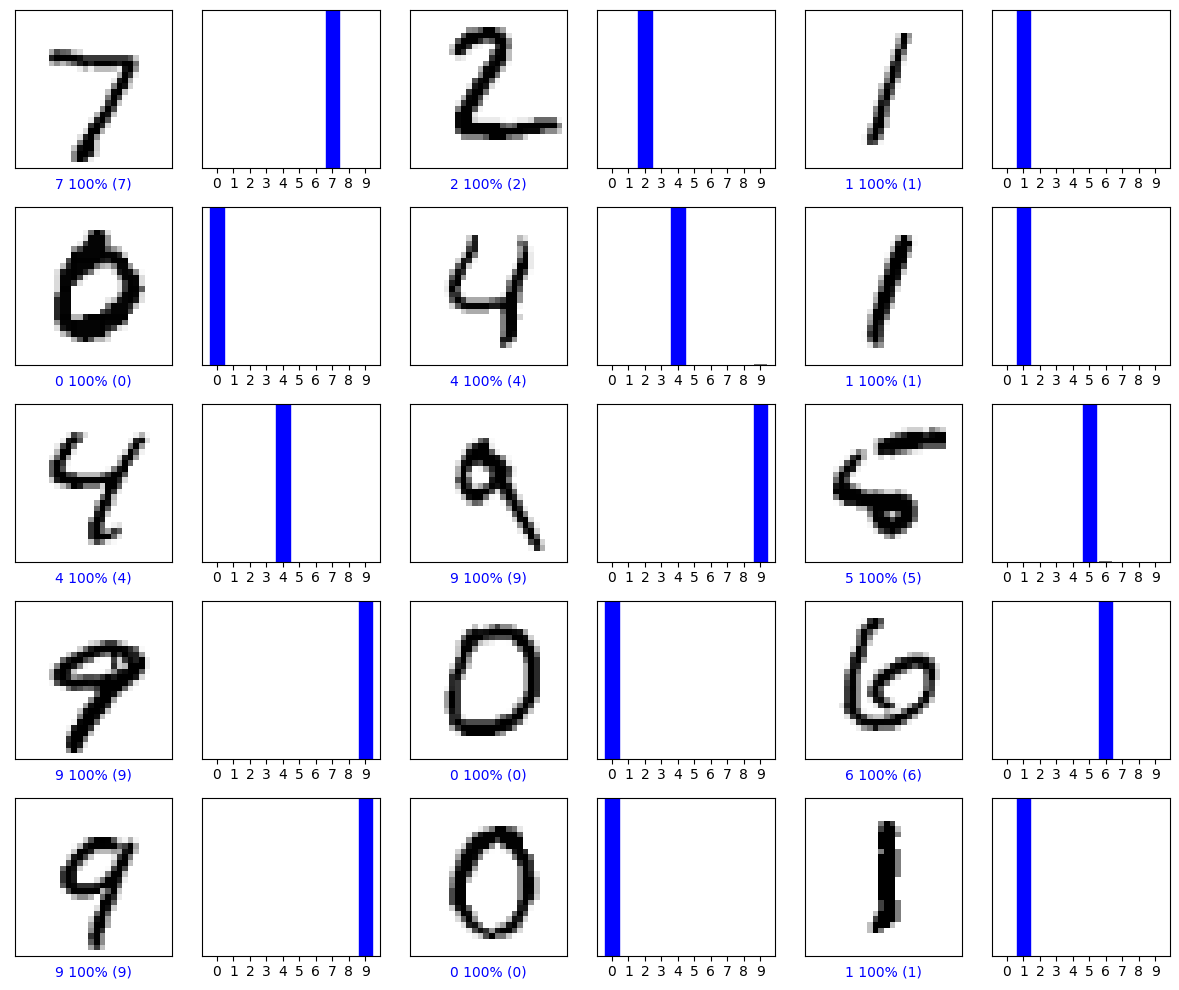

In [27]:

plot_predictions(predictions, y_test, 5, 3)

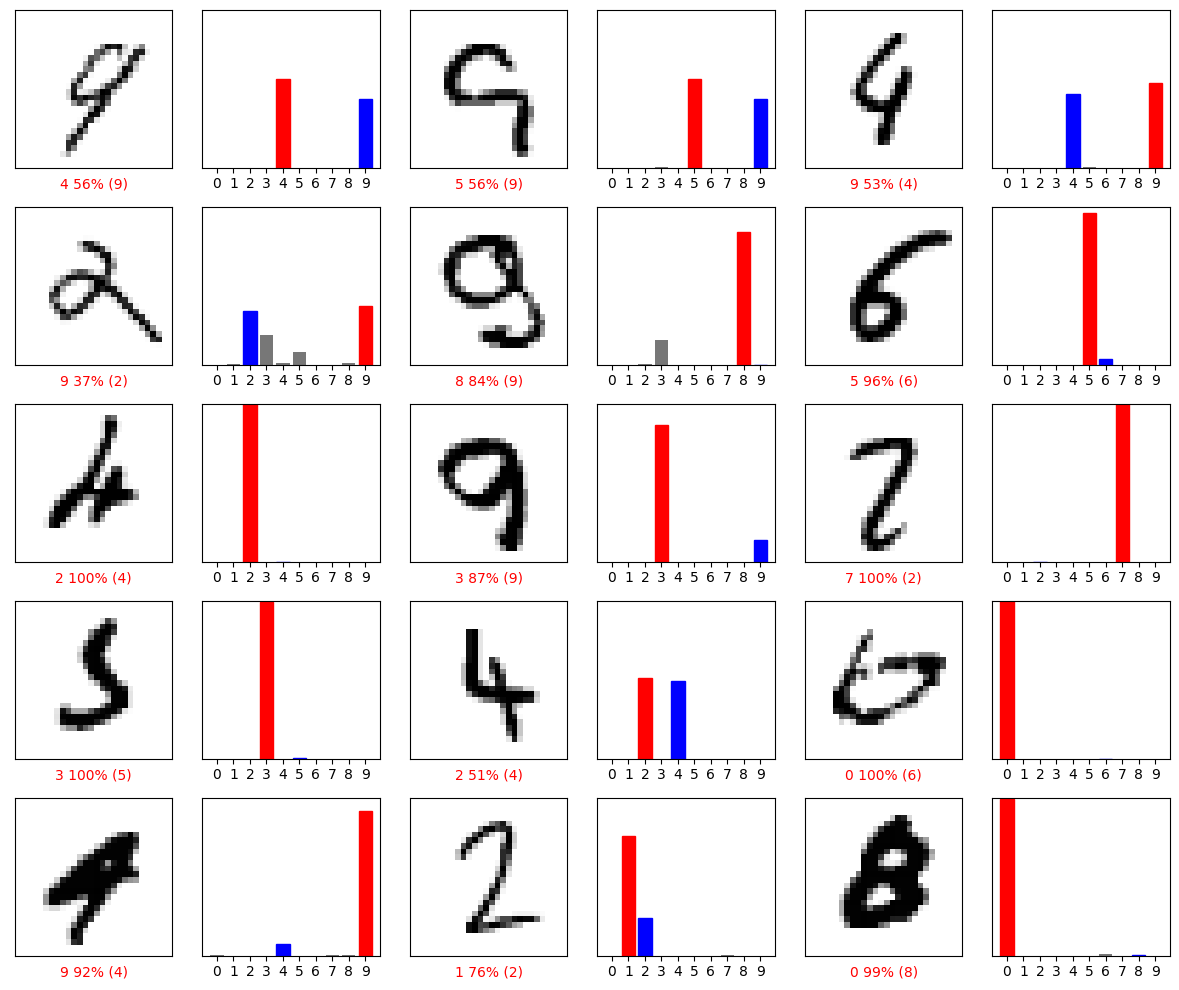

In [28]:
show_misclassified(predictions, y_test, 5, 3)

# Result comparison between the various models

The results show that the best performing model in the test set may not be the best model in the training set. This is the most relevant point here. Also, if you run this notebook multiple times, the best performing model is not necessarily the model with more trainable parameters. 

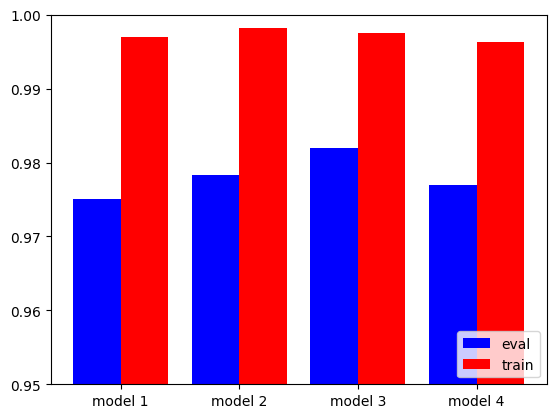

In [29]:
show_accuracies()    

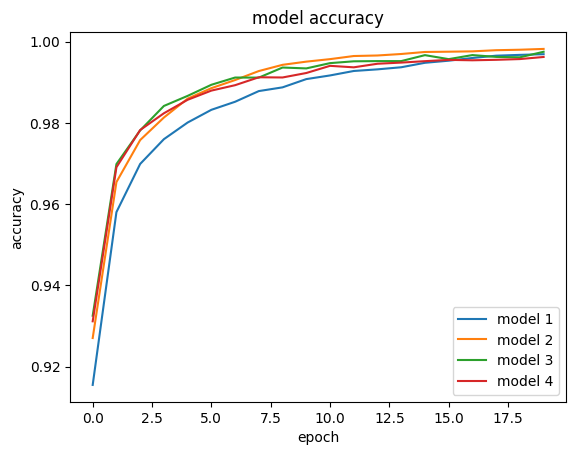

In [30]:
show_histories() 
